# Radon-CDT Demo

This notebook accompanies the following tutorial:

https://github.com/skolouri/Radon-Cumulative-Distribution-Transform


In [1]:
import numpy as np
import sys
sys.path.append('./transportBasedTransforms/')
from skimage.io import imread
from skimage.transform import radon,iradon

import transportBasedTransforms.radonCDT as RCDT
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def relu(x):
    return (1*(x>0))*x

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=np.expand_dims(x_train.astype('float32')/255.,3)
x_test=np.expand_dims(x_test.astype('float32')/255.,3)

## Nonlinearty experiment

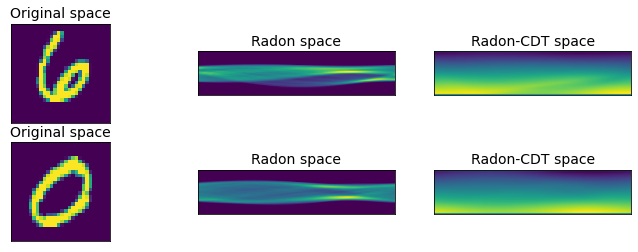

In [4]:
#Get a Radon-CDT object
theta=np.arange(180)
rcdt=RCDT.RadonCDT(theta)
# Load images and calculate their Radon-CDT
np.random.seed(2)
I=[]
rI=[]
Ihat=[]
rndindex=np.random.randint(0,60000,size=(2))
for i in range(2):
    I.append(x_train[rndindex[i],...].squeeze())
    rI.append(radon(I[i],theta,circle=False))
    Ihat.append(rcdt.transform(I[i]))
data=[I,rI,Ihat]
fig,ax=plt.subplots(2,3,figsize=(12,4))
title=['Original space','Radon space','Radon-CDT space']
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(data[j][i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])    
        ax[i,j].set_title(title[j],fontsize=14)

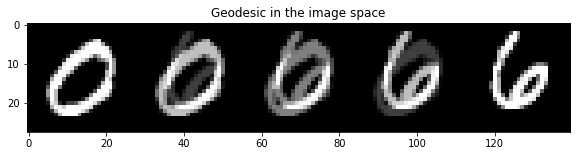

In [5]:
# Geodesic in the image space
M,N=I[0].shape
alpha=np.linspace(0,1,num=5)
geoImage=np.zeros((M,N*5))
for i in range(5):
    geoImage[:,i*N:(i+1)*N]=alpha[i]*I[0]+(1-alpha[i])*I[1]
fig, ax=plt.subplots(1,1,figsize=(10,2))
ax.imshow(geoImage,cmap='gray')
ax.set_title('Geodesic in the image space')
plt.show()

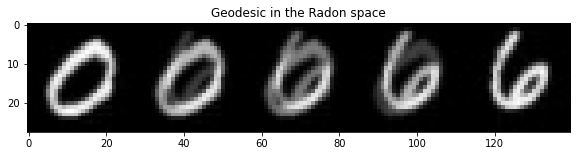

In [6]:
# Geodesic in the image space
M,N=I[0].shape
alpha=np.linspace(0,1,num=5)
geoRadon=np.zeros((M,N*5))
for i in range(5):
    geoRadon[:,i*N:(i+1)*N]=relu(iradon(alpha[i]*rI[0]+(1-alpha[i])*rI[1],output_size=28))
fig, ax=plt.subplots(1,1,figsize=(10,2))
ax.imshow(geoRadon,cmap='gray')
ax.set_title('Geodesic in the Radon space')
plt.show()

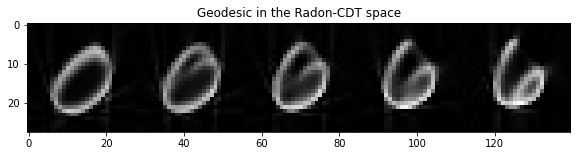

In [7]:
# Geodesic in the image space
M,N=I[0].shape
alpha=np.linspace(0,1,num=5)
geoRCDT=np.zeros((M,N*5))
for i in range(5):
    geoRCDT[:,i*N:(i+1)*N]=relu(rcdt.itransform(alpha[i]*Ihat[0]+(1-alpha[i])*Ihat[1]))
fig, ax=plt.subplots(1,1,figsize=(10,2))
ax.imshow(geoRCDT,cmap='gray')
ax.set_title('Geodesic in the Radon-CDT space')
plt.show()